In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# The dataset contains data about consumption of meat by people from different countries. The dataset contains data like type of meat, quantity, measure, country, time

In [2]:
meat = pd.read_csv("/kaggle/input/meat-consumption/meat_consumption.csv")
meat

,location,indicator,subject,measure,frequency,time,value
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244
...,...,...,...,...,...,...,...
12135,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2024,732.149998
12136,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2025,737.008238
12137,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2026,741.104095
12138,EU27,MEATCONSUMP,SHEEP,THND_TONNE,A,2027,743.489549


In [3]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   12140 non-null  object 
 1   indicator  12140 non-null  object 
 2   subject    12140 non-null  object 
 3   measure    12140 non-null  object 
 4   frequency  12140 non-null  object 
 5   time       12140 non-null  int64  
 6   value      12140 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 664.0+ KB


#### There are no null values in the above dataset

In [4]:
meat.describe()

,time,value
count,12140.000000,1.214000e+04
mean,2009.042175,2.245855e+03
std,11.233660,1.040812e+04
min,1990.000000,7.505681e-08
25%,1999.000000,5.013586e+00
50%,2009.000000,2.427455e+01
75%,2019.000000,4.355984e+02
max,2028.000000,1.402526e+05


In [5]:
meat['location'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'ARG',
       'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'IND', 'IDN', 'IRN',
       'ISR', 'KAZ', 'MYS', 'NGA', 'PAK', 'PRY', 'PER', 'PHL', 'RUS',
       'SAU', 'ZAF', 'THA', 'UKR', 'VNM', 'WLD', 'EU27', 'OECD', 'BRICS',
       'NOR', 'CHE', 'GBR'], dtype=object)

In [6]:
meat['indicator'].unique()

array(['MEATCONSUMP'], dtype=object)

In [7]:
meat['subject'].unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [8]:
meat['measure'].unique()

array(['KG_CAP', 'THND_TONNE'], dtype=object)

In [9]:
meat['frequency'].unique()

array(['A'], dtype=object)

#### Since the columns - frequency and indicator has single value, it doesn't add any value to the analysis. Those columns will be dropped from the dataset.

In [10]:
meat.drop(['frequency','indicator'],axis=1, inplace=True)
meat

,location,subject,measure,time,value
0,AUS,BEEF,KG_CAP,1990,0.000004
1,AUS,BEEF,KG_CAP,1991,27.808401
2,AUS,BEEF,KG_CAP,1992,26.278166
3,AUS,BEEF,KG_CAP,1993,26.244478
4,AUS,BEEF,KG_CAP,1994,25.541244
...,...,...,...,...,...
12135,EU27,SHEEP,THND_TONNE,2024,732.149998
12136,EU27,SHEEP,THND_TONNE,2025,737.008238
12137,EU27,SHEEP,THND_TONNE,2026,741.104095
12138,EU27,SHEEP,THND_TONNE,2027,743.489549


#### The meat value is measured in two quantities: KG_CAP stands for "kilograms per capita" and  THND_TONNE stands for "thousand metric tonnes". To avoid outliers or inaccurate results, we would convert all the values into one measurable quantity.

In [11]:
meat['KG_CAP values'] = meat['value']

conversion_factor = 1000
meat.loc[meat['measure'] == 'THND_TONNE', 'KG_CAP values'] *= conversion_factor

meat

,location,subject,measure,time,value,KG_CAP values
0,AUS,BEEF,KG_CAP,1990,0.000004,0.000004
1,AUS,BEEF,KG_CAP,1991,27.808401,27.808401
2,AUS,BEEF,KG_CAP,1992,26.278166,26.278166
3,AUS,BEEF,KG_CAP,1993,26.244478,26.244478
4,AUS,BEEF,KG_CAP,1994,25.541244,25.541244
...,...,...,...,...,...,...
12135,EU27,SHEEP,THND_TONNE,2024,732.149998,732149.997987
12136,EU27,SHEEP,THND_TONNE,2025,737.008238,737008.238160
12137,EU27,SHEEP,THND_TONNE,2026,741.104095,741104.095445
12138,EU27,SHEEP,THND_TONNE,2027,743.489549,743489.548800


#### The time column is of datatype - integer. Converting it into date format for better analysis and generating better insights.

In [12]:
meat['time'] = pd.to_datetime(meat['time'], format='%Y')
meat

,location,subject,measure,time,value,KG_CAP values
0,AUS,BEEF,KG_CAP,1990-01-01,0.000004,0.000004
1,AUS,BEEF,KG_CAP,1991-01-01,27.808401,27.808401
2,AUS,BEEF,KG_CAP,1992-01-01,26.278166,26.278166
3,AUS,BEEF,KG_CAP,1993-01-01,26.244478,26.244478
4,AUS,BEEF,KG_CAP,1994-01-01,25.541244,25.541244
...,...,...,...,...,...,...
12135,EU27,SHEEP,THND_TONNE,2024-01-01,732.149998,732149.997987
12136,EU27,SHEEP,THND_TONNE,2025-01-01,737.008238,737008.238160
12137,EU27,SHEEP,THND_TONNE,2026-01-01,741.104095,741104.095445
12138,EU27,SHEEP,THND_TONNE,2027-01-01,743.489549,743489.548800


In [13]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   location       12140 non-null  object        
 1   subject        12140 non-null  object        
 2   measure        12140 non-null  object        
 3   time           12140 non-null  datetime64[ns]
 4   value          12140 non-null  float64       
 5   KG_CAP values  12140 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 569.2+ KB


In [14]:
meat.describe()

,value,KG_CAP values
count,1.214000e+04,1.214000e+04
mean,2.245855e+03,2.240469e+06
std,1.040812e+04,1.040928e+07
min,7.505681e-08,7.505681e-08
25%,5.013586e+00,6.008030e+00
50%,2.427455e+01,3.970682e+01
75%,4.355984e+02,4.355984e+05
max,1.402526e+05,1.402526e+08


In [15]:
meat

,location,subject,measure,time,value,KG_CAP values
0,AUS,BEEF,KG_CAP,1990-01-01,0.000004,0.000004
1,AUS,BEEF,KG_CAP,1991-01-01,27.808401,27.808401
2,AUS,BEEF,KG_CAP,1992-01-01,26.278166,26.278166
3,AUS,BEEF,KG_CAP,1993-01-01,26.244478,26.244478
4,AUS,BEEF,KG_CAP,1994-01-01,25.541244,25.541244
...,...,...,...,...,...,...
12135,EU27,SHEEP,THND_TONNE,2024-01-01,732.149998,732149.997987
12136,EU27,SHEEP,THND_TONNE,2025-01-01,737.008238,737008.238160
12137,EU27,SHEEP,THND_TONNE,2026-01-01,741.104095,741104.095445
12138,EU27,SHEEP,THND_TONNE,2027-01-01,743.489549,743489.548800


#### The data seems to be cleaned and ready for analysis to generate insights from the data

## 1. Which is the type of meat that is being highly consumed?

/tmp/ipykernel_35/280589341.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_data.index, rotation=45, ha='right')
/tmp/ipykernel_35/280589341.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_data.index, rotation=45, ha='right')


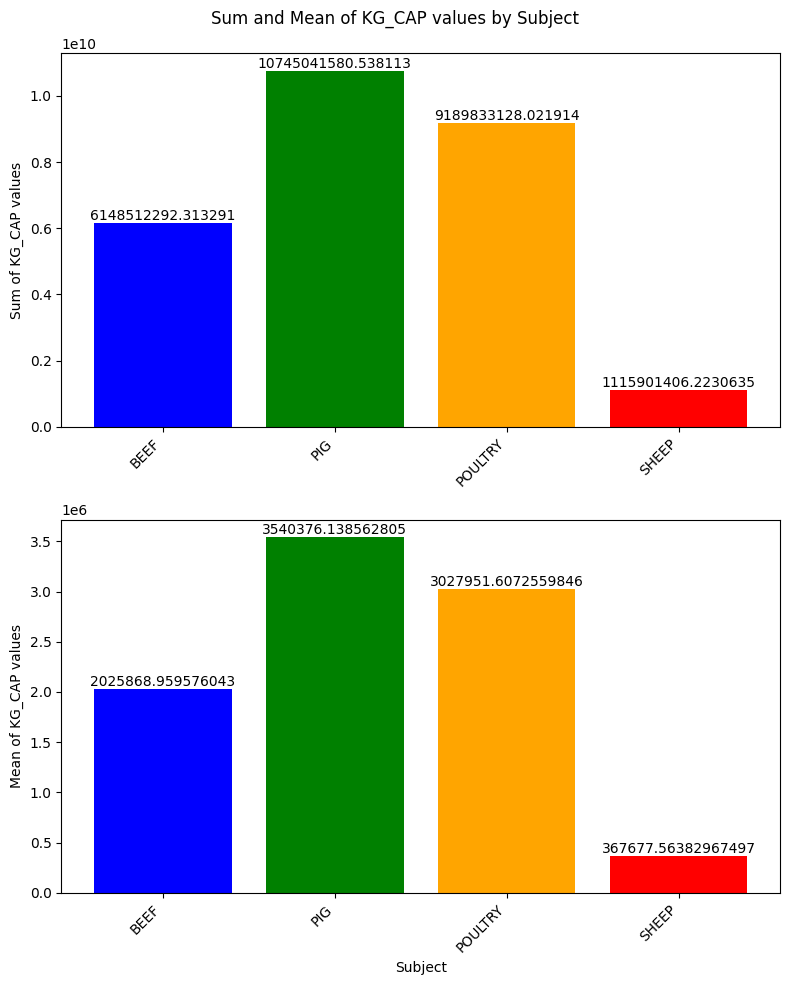

In [18]:
grouped_data = meat.groupby('subject')['KG_CAP values'].agg(['sum', 'mean'])

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot the sum of KG_CAP values
colors = ['blue', 'green', 'orange', 'red']
ax1.bar(grouped_data.index, grouped_data['sum'], color=colors)
ax1.set_ylabel('Total mean consumed')
ax1.set_xticklabels(grouped_data.index, rotation=45, ha='right')

# Add exact values on top of each bar in the sum plot
for i, v in enumerate(grouped_data['sum']):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Plot the mean of KG_CAP values
ax2.bar(grouped_data.index, grouped_data['mean'], color=colors)
ax2.set_ylabel('Mean consumption of meat')
ax2.set_xticklabels(grouped_data.index, rotation=45, ha='right')

# Add exact values on top of each bar in the mean plot
for i, v in enumerate(grouped_data['mean']):
    ax2.text(i, v, str(v), ha='center', va='bottom')

# Set x-axis label and title for the entire figure
plt.xlabel('Type of meat')
plt.suptitle('Total and mean consumption of meat')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### From the above graph, the meat type - PIG is being consumed highly while SHEEP is consumed least by people across the world

## 2.What is the period where higher amount of meat was being consumed by the people across the world by type?

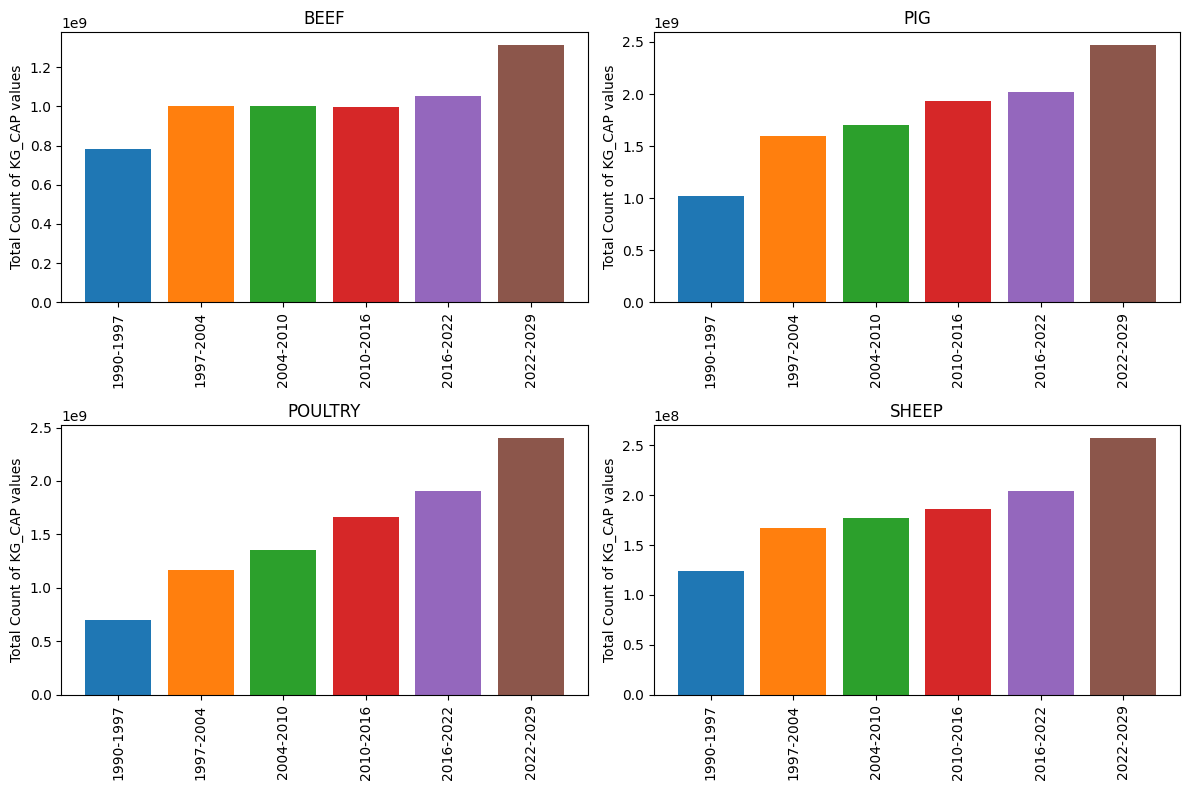

In [22]:
meat['time'] = pd.to_datetime(meat['time'], format='%Y')

subjects = ['BEEF', 'PIG', 'POULTRY', 'SHEEP']
filtered_data = meat[meat['subject'].isin(subjects)]

time_intervals = [
    (pd.Timestamp('1990-01-01'), pd.Timestamp('1997-01-01')),
    (pd.Timestamp('1997-01-01'), pd.Timestamp('2004-01-01')),
    (pd.Timestamp('2004-01-01'), pd.Timestamp('2010-01-01')),
    (pd.Timestamp('2010-01-01'), pd.Timestamp('2016-01-01')),
    (pd.Timestamp('2016-01-01'), pd.Timestamp('2022-01-01')),
    (pd.Timestamp('2022-01-01'), pd.Timestamp('2029-01-01'))
]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, subject in enumerate(subjects):
    ax = axes[i]
    ax.set_title(subject)
  
    subject_data = filtered_data[filtered_data['subject'] == subject]

    x_labels = []
    x_ticks = []
    for j, (start_date, end_date) in enumerate(time_intervals):
        interval_data = subject_data[(subject_data['time'] >= start_date) & (subject_data['time'] < end_date)]
        total_count = interval_data['KG_CAP values'].sum()
        
        ax.bar(j, total_count)
        
        x_label = f'{start_date.year}-{end_date.year}'
        x_labels.append(x_label)
        x_ticks.append(j)

    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, rotation='vertical')

    ax.set_ylabel('Total Count of KG_CAP values')

plt.tight_layout()

plt.show()

#### From the above plotting, it could be seen that higher volume of meat of all types was being consumed from the year 2022 to 2028. Note that the years - 2022 to 2028 was adjusted in the data. It isn't a real time data.

## 3. Which country is the largest consumer of meat?

/tmp/ipykernel_35/4172527107.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_locations.index, rotation=45, ha='right')


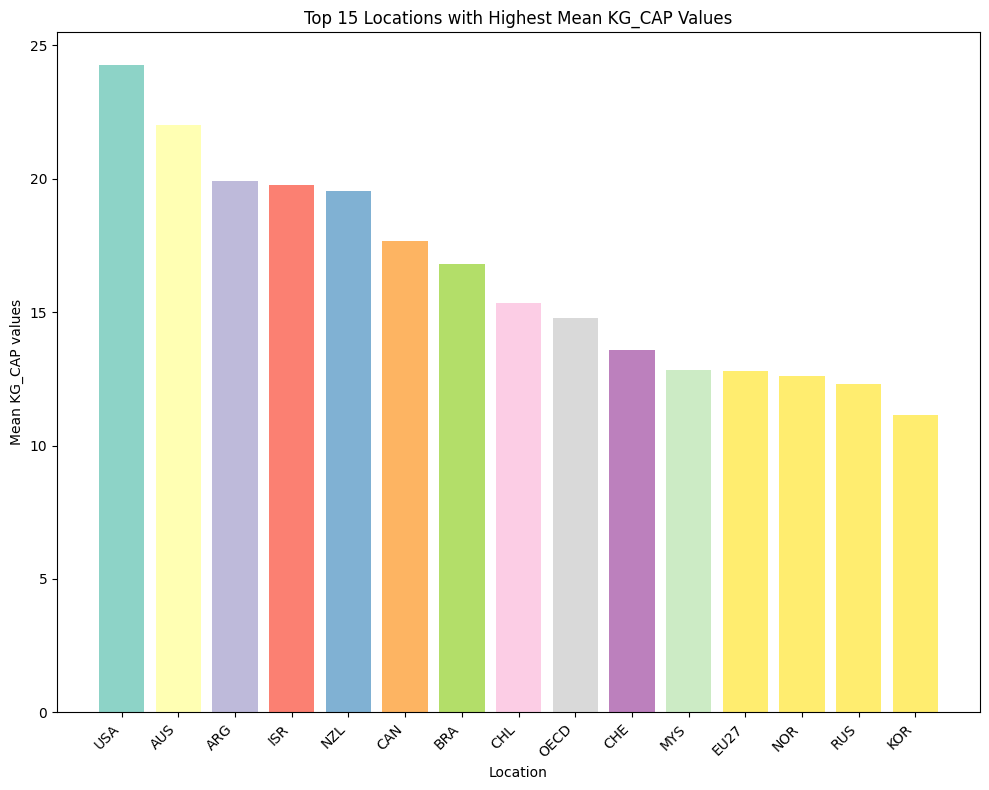

In [26]:
grouped_data = filtered_data.groupby('location')['KG_CAP values'].mean()

# Get the top 15 locations with the highest mean 'KG_CAP values'
top_locations = grouped_data.nlargest(15)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a color for each bar
colors = plt.cm.Set3(range(len(top_locations)))

# Plot the top locations with different colors
ax.bar(top_locations.index, top_locations.values, color=colors)

# Set the x-axis label at a 45-degree angle
ax.set_xticklabels(top_locations.index, rotation=45, ha='right')

# Set the x-axis label
ax.set_xlabel('Location')

# Set the y-axis label
ax.set_ylabel('Mean KG_CAP values')

# Set the title
ax.set_title('Top 15 Locations with Highest Mean KG_CAP Values')

# Adjust spacing between bars
plt.tight_layout()

# Display the plot
plt.show()